# Slither Project

## Test environment 

In [1]:
import gym
import universe
import numpy as np
import tensorflow as tf
import time

In [2]:
#export OPENAI_REMOTE_VERBOSE=0 ##put this in the terminal to remove verbos#e
#env = gym.make('internet.SlitherIO-v0')

In [3]:
#actionlist = [action for action in env.action_space]
#env.action_space.sample()

In [4]:
"""
There are 12 possible defined actions. The original number of actions are #pixels * 2, meaning we can
press any pixel on the screen to define directions and either press space at the same time or not. In order
to lower the number of allowed actions and still get a smooth direction control we decide to define 12 regions
in the border of the screen where we will press either the center of the region or a random pixel in that region
(depending on the strategy taken) so as to move in that direction.
"""
##y = 85-386, x = 18-522
topleft = (19,86)
bottomright = (522,386)
div_x = 5
div_y = 3
interx = int((bottomright[0]-topleft[0])/div_x)
intery = int((bottomright[1]-topleft[1])/div_y)
pointers = ([(topleft[0],topleft[1]+intery*i) for i in range(div_y-1,-1,-1)]+
           [(topleft[0]+interx*i,topleft[1]) for i in range(1,div_x-1)]+
           [(topleft[0]+interx*4,topleft[1]+intery*i) for i in range(div_y)]+
           [(topleft[0]+interx*i,topleft[1]+intery*2) for i in range(div_x-2,0,-1)])
nactions = 12


def idx2act(idx):
    p = [[('PointerEvent', x+int(interx/2), y+int(intery/2), 0)] for (x,y) in pointers]
    return p[idx]


p = idx2act(0)
#[i for i in range(3,-1,-1)]
p

[('PointerEvent', 69, 336, 0)]

In [6]:
env = gym.make('internet.SlitherIO-v0')
env.configure(remotes=1)  # automatically creates a local docker container
observation_n = env.reset()
count = 0
#event = [('PointerEvent', 200,200, True)]
#event = [('PointerEvent', 504, 200, 0)]
#action_n = [event for ob in observation_n]  # your agent here
idx = -1
while True:
  #idx+=1
  #idx = idx%nactions
  #action = idx2act(idx)
  #action_n = [action for ob in observation_n]  # your agent here
  observation_n, reward_n, done_n, info = env.step(action_n)
  count += reward_n[0]
  if observation_n[0] != None:
      print('action:',action,'\n observation:',observation_n,'\n reward:',reward_n,'\n done_n:',done_n,'\n info:',info,'\n count:',count)
  env.render()
  time.sleep(1.0)

[2018-05-14 16:42:53,988] Making new env: internet.SlitherIO-v0
[2018-05-14 16:42:53,992] Killing and removing container: id=56cc018c86f907bfbe09f444397dc00b253748ba957b61bc3e21f1ea622c49ae
[2018-05-14 16:42:54,146] Ports used: dict_keys([])
[2018-05-14 16:42:54,147] [0] Creating container: image=quay.io/openai/universe.flashgames:0.20.28. Run the same thing by hand as: docker run -p 5900:5900 -p 15900:15900 --privileged --ipc host --cap-add SYS_ADMIN quay.io/openai/universe.flashgames:0.20.28
[2018-05-14 16:42:55,199] Remote closed: address=localhost:15900
[2018-05-14 16:42:55,200] At least one sockets was closed by the remote. Sleeping 1s...


universe-u7NjUm-0 | Setting VNC and rewarder password: openai
universe-u7NjUm-0 | [Mon May 14 14:42:55 UTC 2018] Waiting for /tmp/.X11-unix/X0 to be created (try 1/10)
universe-u7NjUm-0 | [tigervnc] 
universe-u7NjUm-0 | [tigervnc] Xvnc TigerVNC 1.7.0 - built Sep  8 2016 10:39:22
universe-u7NjUm-0 | [tigervnc] Copyright (C) 1999-2016 TigerVNC Team and many others (see README.txt)
universe-u7NjUm-0 | [tigervnc] See http://www.tigervnc.org for information on TigerVNC.
universe-u7NjUm-0 | [tigervnc] Underlying X server release 11400000, The X.Org Foundation
universe-u7NjUm-0 | [tigervnc] 
universe-u7NjUm-0 | [tigervnc] Initializing built-in extension VNC-EXTENSION
universe-u7NjUm-0 | [tigervnc] Initializing built-in extension Generic Event Extension
universe-u7NjUm-0 | [tigervnc] Initializing built-in extension SHAPE
universe-u7NjUm-0 | [tigervnc] Initializing built-in extension MIT-SHM
universe-u7NjUm-0 | [tigervnc] Initializing built-in extension XInputExtension
universe-u7NjUm-0 | [tige

universe-u7NjUm-0 | [2018-05-14 14:42:55,791] [INFO:root] [EnvStatus] Changing env_state: None (env_id=None) -> resetting (env_id=None) (episode_id: 0->1, fps=60)
universe-u7NjUm-0 | [2018-05-14 14:42:55,791] [INFO:root] [MainThread] Env state: env_id=None episode_id=1
universe-u7NjUm-0 | [tigervnc]  Connections: accepted: 127.0.0.1::38462
universe-u7NjUm-0 | [tigervnc]  SConnection: Client needs protocol version 3.8
universe-u7NjUm-0 | [2018-05-14 14:42:55,791] [INFO:root] [MainThread] Writing None to /tmp/demo/env_id.txt
universe-u7NjUm-0 | [tigervnc]  SConnection: Client requests security type VncAuth(2)
universe-u7NjUm-0 | [tigervnc]  VNCSConnST:  Server default pixel format depth 24 (32bpp) little-endian rgb888
universe-u7NjUm-0 | 2018/05/14 14:42:55 I0514 14:42:55.79392 61 gymvnc.go:550] [0:127.0.0.1:5900] connection established
universe-u7NjUm-0 | [tigervnc]  VNCSConnST:  Client pixel format depth 24 (32bpp) little-endian bgr888
universe-u7NjUm-0 | [Mon May 14 14:42:55 UTC 2018]

[2018-05-14 16:42:56,207] Using the golang VNC implementation


universe-u7NjUm-0 | [nginx] 2018/05/14 14:42:56 [info] 64#64: *1 client 172.17.0.1 closed keepalive connection


[2018-05-14 16:42:56,208] Using VNCSession arguments: {'start_timeout': 7, 'encoding': 'tight', 'subsample_level': 2, 'fine_quality_level': 50}. (Customize by running "env.configure(vnc_kwargs={...})"


universe-u7NjUm-0 | [tigervnc] 
universe-u7NjUm-0 | [tigervnc] Mon May 14 14:42:56 2018
universe-u7NjUm-0 | [tigervnc]  Connections: closed: 172.17.0.1::38592 (Clean disconnection)
universe-u7NjUm-0 | [tigervnc]  EncodeManager: Framebuffer updates: 0
universe-u7NjUm-0 | [tigervnc]  EncodeManager:   Total: 0 rects, 0 pixels
universe-u7NjUm-0 | [tigervnc]  EncodeManager:          0 B (1:-nan ratio)


[2018-05-14 16:42:56,216] [0] Connecting to environment: vnc://localhost:5900 password=openai. If desired, you can manually connect a VNC viewer, such as TurboVNC. Most environments provide a convenient in-browser VNC client: http://localhost:15900/viewer/?password=openai


NameError: name 'action_n' is not defined

universe-u7NjUm-0 | [tigervnc]  Connections: accepted: 172.17.0.1::38608
universe-u7NjUm-0 | [tigervnc]  SConnection: Client needs protocol version 3.8
universe-u7NjUm-0 | [tigervnc]  SConnection: Client requests security type VncAuth(2)
universe-u7NjUm-0 | [tigervnc]  VNCSConnST:  Server default pixel format depth 24 (32bpp) little-endian rgb888
universe-u7NjUm-0 | [tigervnc]  VNCSConnST:  Client pixel format depth 24 (32bpp) little-endian bgr888
universe-u7NjUm-0 | [2018-05-14 14:42:56,233] [INFO:universe.rewarder.remote] Client connecting: peer=tcp4:127.0.0.1:55676 observer=False
universe-u7NjUm-0 | [2018-05-14 14:42:56,234] [INFO:universe.rewarder.remote] WebSocket connection established
universe-u7NjUm-0 | [nginx] 2018/05/14 14:42:57 [info] 64#64: *5 client sent invalid request while reading client request line, client: 127.0.0.1, server: , request: "CONNECT www.google.com:443 HTTP/1.1"
universe-u7NjUm-0 | [nginx] 2018/05/14 14:42:57 [info] 64#64: *6 client sent invalid request wh

[2018-05-14 16:43:16,245] [0:localhost:5900] ntpdate -q -p 8 localhost call timed out after 20.0s; killing the subprocess. This is ok, but you could have more accurate timings by enabling UDP port 123 traffic to your env. (Alternatively, you can try increasing the timeout by setting environment variable UNIVERSE_NTPDATE_TIMEOUT=10.)


universe-u7NjUm-0 | [nginx] 2018/05/14 14:43:16 [info] 64#64: *10 client closed connection while waiting for request, client: 172.17.0.1, server: 0.0.0.0:15900
universe-u7NjUm-0 | [nginx] 2018/05/14 14:43:16 [info] 64#64: *11 client closed connection while waiting for request, client: 172.17.0.1, server: 0.0.0.0:15900
universe-u7NjUm-0 | [nginx] 2018/05/14 14:43:16 [info] 64#64: *12 client closed connection while waiting for request, client: 172.17.0.1, server: 0.0.0.0:15900
universe-u7NjUm-0 | [nginx] 2018/05/14 14:43:16 [info] 64#64: *13 client closed connection while waiting for request, client: 172.17.0.1, server: 0.0.0.0:15900
universe-u7NjUm-0 | [nginx] 2018/05/14 14:43:16 [info] 64#64: *14 client closed connection while waiting for request, client: 172.17.0.1, server: 0.0.0.0:15900
universe-u7NjUm-0 | [nginx] 2018/05/14 14:43:16 [info] 64#64: *15 client closed connection while waiting for request, client: 172.17.0.1, server: 0.0.0.0:15900
universe-u7NjUm-0 | [nginx] 2018/05/14 1

[2018-05-14 16:43:16,284] [0:localhost:5900] Sending reset for env_id=internet.SlitherIO-v0 fps=60 episode_id=0


universe-u7NjUm-0 | [2018-05-14 14:43:16,285] [INFO:universe.rewarder.remote] Received reset message: {'method': 'v0.env.reset', 'body': {'env_id': 'internet.SlitherIO-v0', 'seed': None, 'fps': 60}, 'headers': {'sent_at': 1526308996.2847571, 'message_id': 10, 'episode_id': '0'}}
universe-u7NjUm-0 | [2018-05-14 14:43:16,289] [INFO:root] [EnvStatus] Changing env_state: running (env_id=None) -> resetting (env_id=internet.SlitherIO-v0) (episode_id: 1->2, fps=60)
universe-u7NjUm-0 | [2018-05-14 14:43:16,289] [ERROR:root] Closing server (via subprocess.close()) and all chromes (via pkill chromedriver || :; pkill chrome || :)
universe-u7NjUm-0 | [init] [2018-05-14 14:43:16,295] init detected end of child process 117 with exit code 0, killed by SIGTERM: 15
universe-u7NjUm-0 | [2018-05-14 14:43:16,297] [INFO:root] [Rewarder] Blocking until env finishes resetting
universe-u7NjUm-0 | [init] [2018-05-14 14:43:16,300] init detected end of child process 132 with exit code 0, not killed by signal
uni

## Attribute tests & exploration

In [6]:
np.shape(observation_n[0]['vision'])

(768, 1024, 3)

In [70]:
a = env.action_space.sample()
a

[KeyEvent<key=_ (0x5f) direction=up>]

In [71]:
a = env.action_space.sample()
a

[PointerEvent<x=797 y=659 buttonmask=147>]

In [52]:
nactionstest = (386-85)*(522-18)*2 # = 301*504*2
nactionstest

303408

In [3]:
print(int((386-85)/3))
print(int((522-18)/5))

100.33333333333333
100.8


## Vision preprocessing 

In [9]:
state = observation_n[0]['vision'][85:386,18:522,:]

In [24]:
from skimage.exposure import rescale_intensity
from skimage.transform import resize
from skimage import data
from skimage.color import rgb2grey
from skimage.color import rgb2gray
from skimage.viewer import ImageViewer

In [26]:
greystate = rgb2grey(state)
new_state = resize(state, (80,80))
new_greystate = resize(greystate, (84,84))
x_t = rescale_intensity(new_greystate,out_range=(0,255))
s_t = np.stack((x_t, x_t, x_t, x_t), axis=2) 
print (s_t.shape)
#In Keras, need to reshape
s_t = s_t.reshape(1, s_t.shape[0], s_t.shape[1], s_t.shape[2])
#viewer1 = ImageViewer(state)
#viewer2 = ImageViewer(greystate)
#viewer3 = ImageViewer(new_state)
#ImageViewer(new_greystate).show()
print(s_t.shape[0])

(84, 84, 4)
1


/home/aserra/tensorflow/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


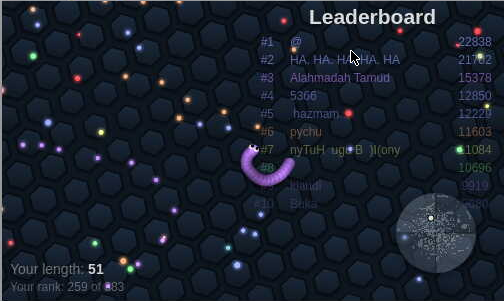

In [98]:
greystate = rgb2grey(state)
greystate = greystate.astype('uint8')
viewer = ImageViewer(greystate)
viewer.show()


In [100]:
greystate = rgb2grey(state)
(greystate*255).astype('uint8')
viewer = ImageViewer(greystate)
viewer.show()

[]